# Pymaceuticals Inc.
---

### Analysis

Once getting rid of the duplicate information, we can see that the study pertains to 248 mice. The study group was made up of 51% male and 49% female mice. Having an almost 1:1 ratio of male to female could show that there either is or is not bias when looking at data. This would be something that could show how each regimen given affects the opposite sex.

We can look at the data for Mouse l509 and see that, for it’s given drug regimen Capomulin, the tumor started out at 45mm3 and ended around 41.5mm3, showing that the drug was effective.

Based on the summary statistics dataframe, Ramicane had a smaller tumor volume standard deviation, variance and mean tumor volume, which could indicate that it was the most effective across its population versus a drug like Ketapril, where variance and standard deviation is higher across its population. Higher tumor volume variance for regimens may indicate the drug is most effective in tumor volume reduction, but further analysis is required to understand whether that variance is negative or positive.

The correlation between mouse weight and average tumor volume is 0.84 for Capomulin. This shows a strong, positive correlation between weight and volume – as weight increases, the average tumor volume also increases. 

 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [153]:
# Checking the number of mice.
num_mice = mouse_complete["Mouse ID"].nunique()
num_mice

249

In [154]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_complete.loc[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [155]:
# Optional: Get all the data for the duplicate mouse ID. 


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_ID = mouse_complete[mouse_complete["Mouse ID"].isin(duplicate_mice_ID)==False]
drop_dup_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [157]:
# Checking the number of mice in the clean DataFrame.
num_mice_after_dup_drop = drop_dup_ID["Mouse ID"].nunique()
num_mice_after_dup_drop

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = drop_dup_ID.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median =drop_dup_ID.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = drop_dup_ID.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = drop_dup_ID.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = drop_dup_ID.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var,
                           "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.":sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_agg_method = drop_dup_ID.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
stats_agg_method
        

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

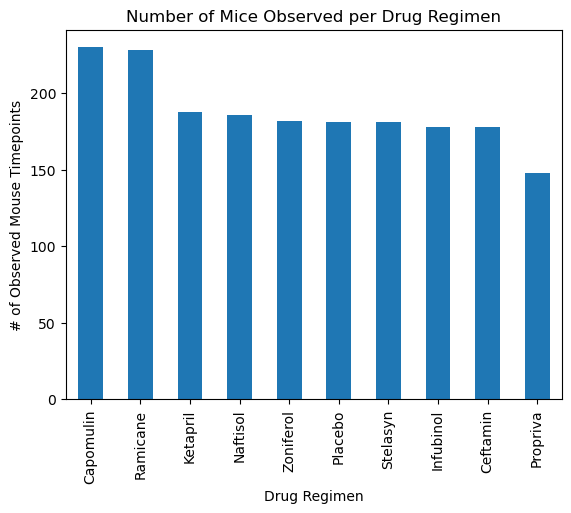

In [160]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg_counts=drop_dup_ID["Drug Regimen"].value_counts()
drug_reg_counts.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice Observed per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

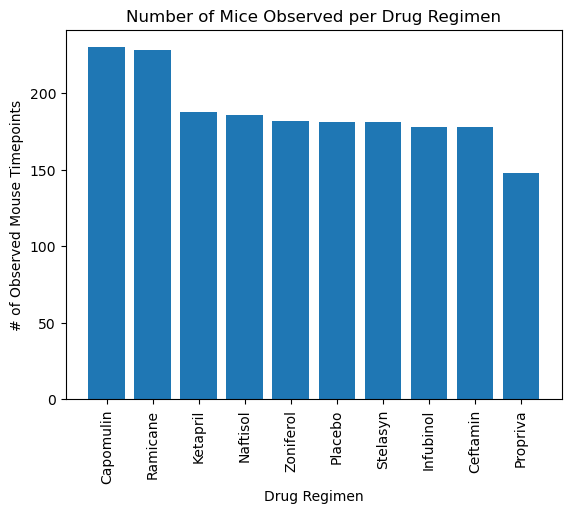

In [161]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#drug_reg_counts
x_axis = drug_reg_counts.index.values
y_axis = drug_reg_counts.values
plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)

plt.title("Number of Mice Observed per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

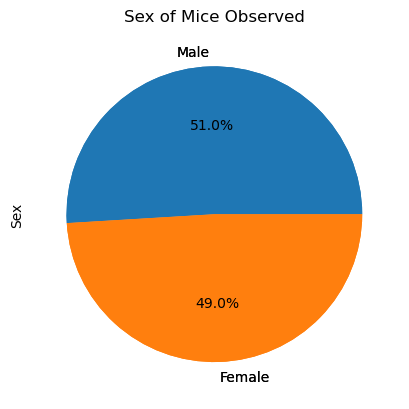

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_reg_counts=drop_dup_ID["Sex"].value_counts()
drug_reg_counts.plot(kind="pie")
drug_reg_counts.plot.pie(autopct=("%1.1f%%"))

plt.title("Sex of Mice Observed")
plt.ylabel("Sex")
plt.show()

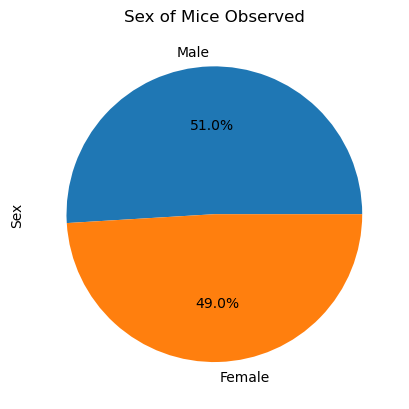

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drug_reg_counts
plt.pie(drug_reg_counts.values, labels=drug_reg_counts.index.values,autopct="%1.1f%%")

plt.title("Sex of Mice Observed")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatment = drop_dup_ID[drop_dup_ID["Drug Regimen"].isin(treatments_list)]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint = treatment.groupby("Drug Regimen")["Timepoint"].idxmax()
last_timepoint = treatment.loc[max_timepoint]
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
463,a203,Infubinol,Female,20,23,45,67.973419,2
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [165]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [166]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

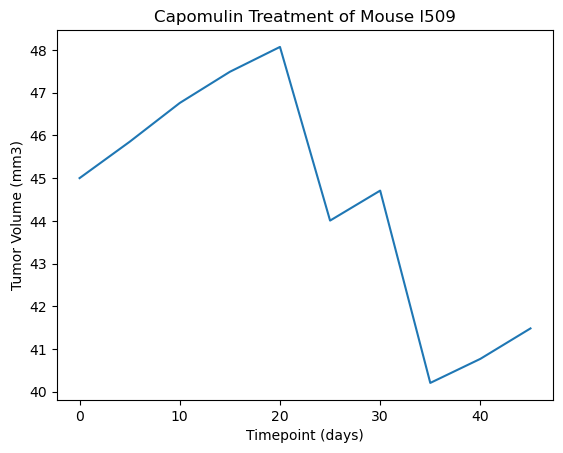

In [167]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
call_mouse = drop_dup_ID.loc[drop_dup_ID["Mouse ID"]=="l509",:]
tum_vol = call_mouse["Tumor Volume (mm3)"]
time_pt = call_mouse["Timepoint"]
plt.plot(time_pt,tum_vol)

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

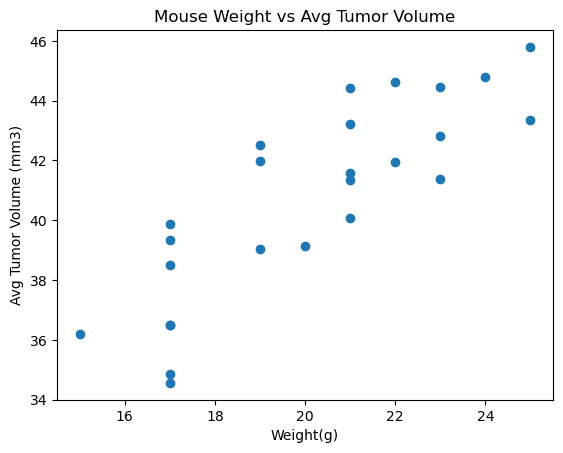

In [168]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_treatment = drop_dup_ID.loc[drop_dup_ID["Drug Regimen"]=="Capomulin",:]
cap_treatment
avg_cap_treatment = cap_treatment.groupby(["Mouse ID"]).mean(["Tumor Volume (mm3)"])
avg_cap_treatment

x_values = avg_cap_treatment.iloc[:,1]
y_values = avg_cap_treatment.iloc[:,3]
plt.scatter(x_values,y_values)

plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


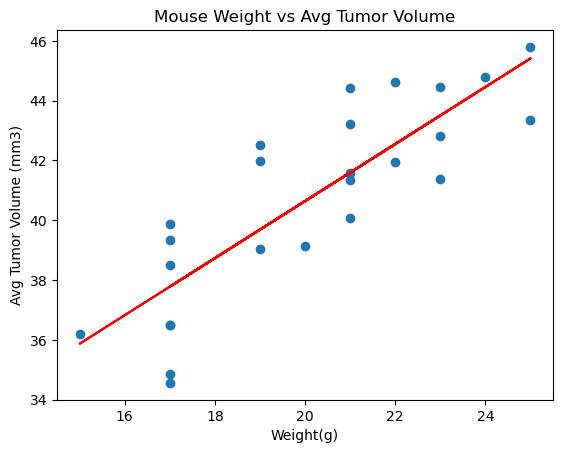

In [169]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

x_values = avg_cap_treatment.iloc[:,1]
y_values = avg_cap_treatment.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()
